### **Install YOLO & Import Libraries**

In [ ]:
!pip install ultralytics kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.0 MB/s eta 0:00:00


In [ ]:
!pip install ultralytics
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### **Download Dataset (Kaggel)**

In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("freak2209/face-data")

print("Path to dataset files:", path)

100%|██████████| 3.27G/3.27G [00:34<00:00, 101MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/freak2209/face-data/versions/1


### **Perpare Dataset Path**

In [ ]:
extract_path = path
print("Extracted files are located here:", extract_path)
print("Contents:", os.listdir(extract_path))

Extracted files are located here: /root/.cache/kagglehub/datasets/freak2209/face-data/versions/1
Contents: ['Custom_Data']


In [ ]:
os.listdir(extract_path)

['Custom_Data']

### **Create YAML file for YOLO training**

In [ ]:
yaml_content = """
train: /root/.cache/kagglehub/datasets/freak2209/face-data/versions/1/Custom_Data/images
val: /root/.cache/kagglehub/datasets/freak2209/face-data/versions/1/Custom_Data/images

nc: 1
names: ['Face']
"""

with open('/content/face_dataset.yaml', 'w') as f:
    f.write(yaml_content)

print("face_dataset.yaml created successfully.")
print(os.listdir('.'))

face_dataset.yaml created successfully.
['.config', 'yolov8n.pt', 'face_dataset.yaml', 'sample_data']


In [ ]:
dataset_yaml = "/content/face_dataset.yaml"
dataset_yaml

'/content/face_dataset.yaml'

### **Train The Model**

In [13]:
model.train(
    data="/content/face_dataset.yaml",
    epochs=10,
    imgsz=640,
    batch=8,
    project="face_detection",
    name="yolov8_face"
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/face_dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_face, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b94f67ac380>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [22]:
model = YOLO("/content/face_detection/yolov8_face/weights/best.pt")

In [41]:
os.listdir("/content/face_detection/yolov8_face")

['val_batch0_labels.jpg',
 'val_batch0_pred.jpg',
 'val_batch2_pred.jpg',
 'labels.jpg',
 'train_batch2.jpg',
 'weights',
 'BoxPR_curve.png',
 'confusion_matrix_normalized.png',
 'results.csv',
 'val_batch2_labels.jpg',
 'train_batch1.jpg',
 'val_batch1_pred.jpg',
 'BoxR_curve.png',
 'confusion_matrix.png',
 'val_batch1_labels.jpg',
 'BoxF1_curve.png',
 'args.yaml',
 'train_batch0.jpg',
 'results.png',
 'BoxP_curve.png']


image 1/1 /content/face_detection/yolov8_face/train_batch0.jpg: 640x640 8 Faces, 205.4ms
Speed: 5.5ms preprocess, 205.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


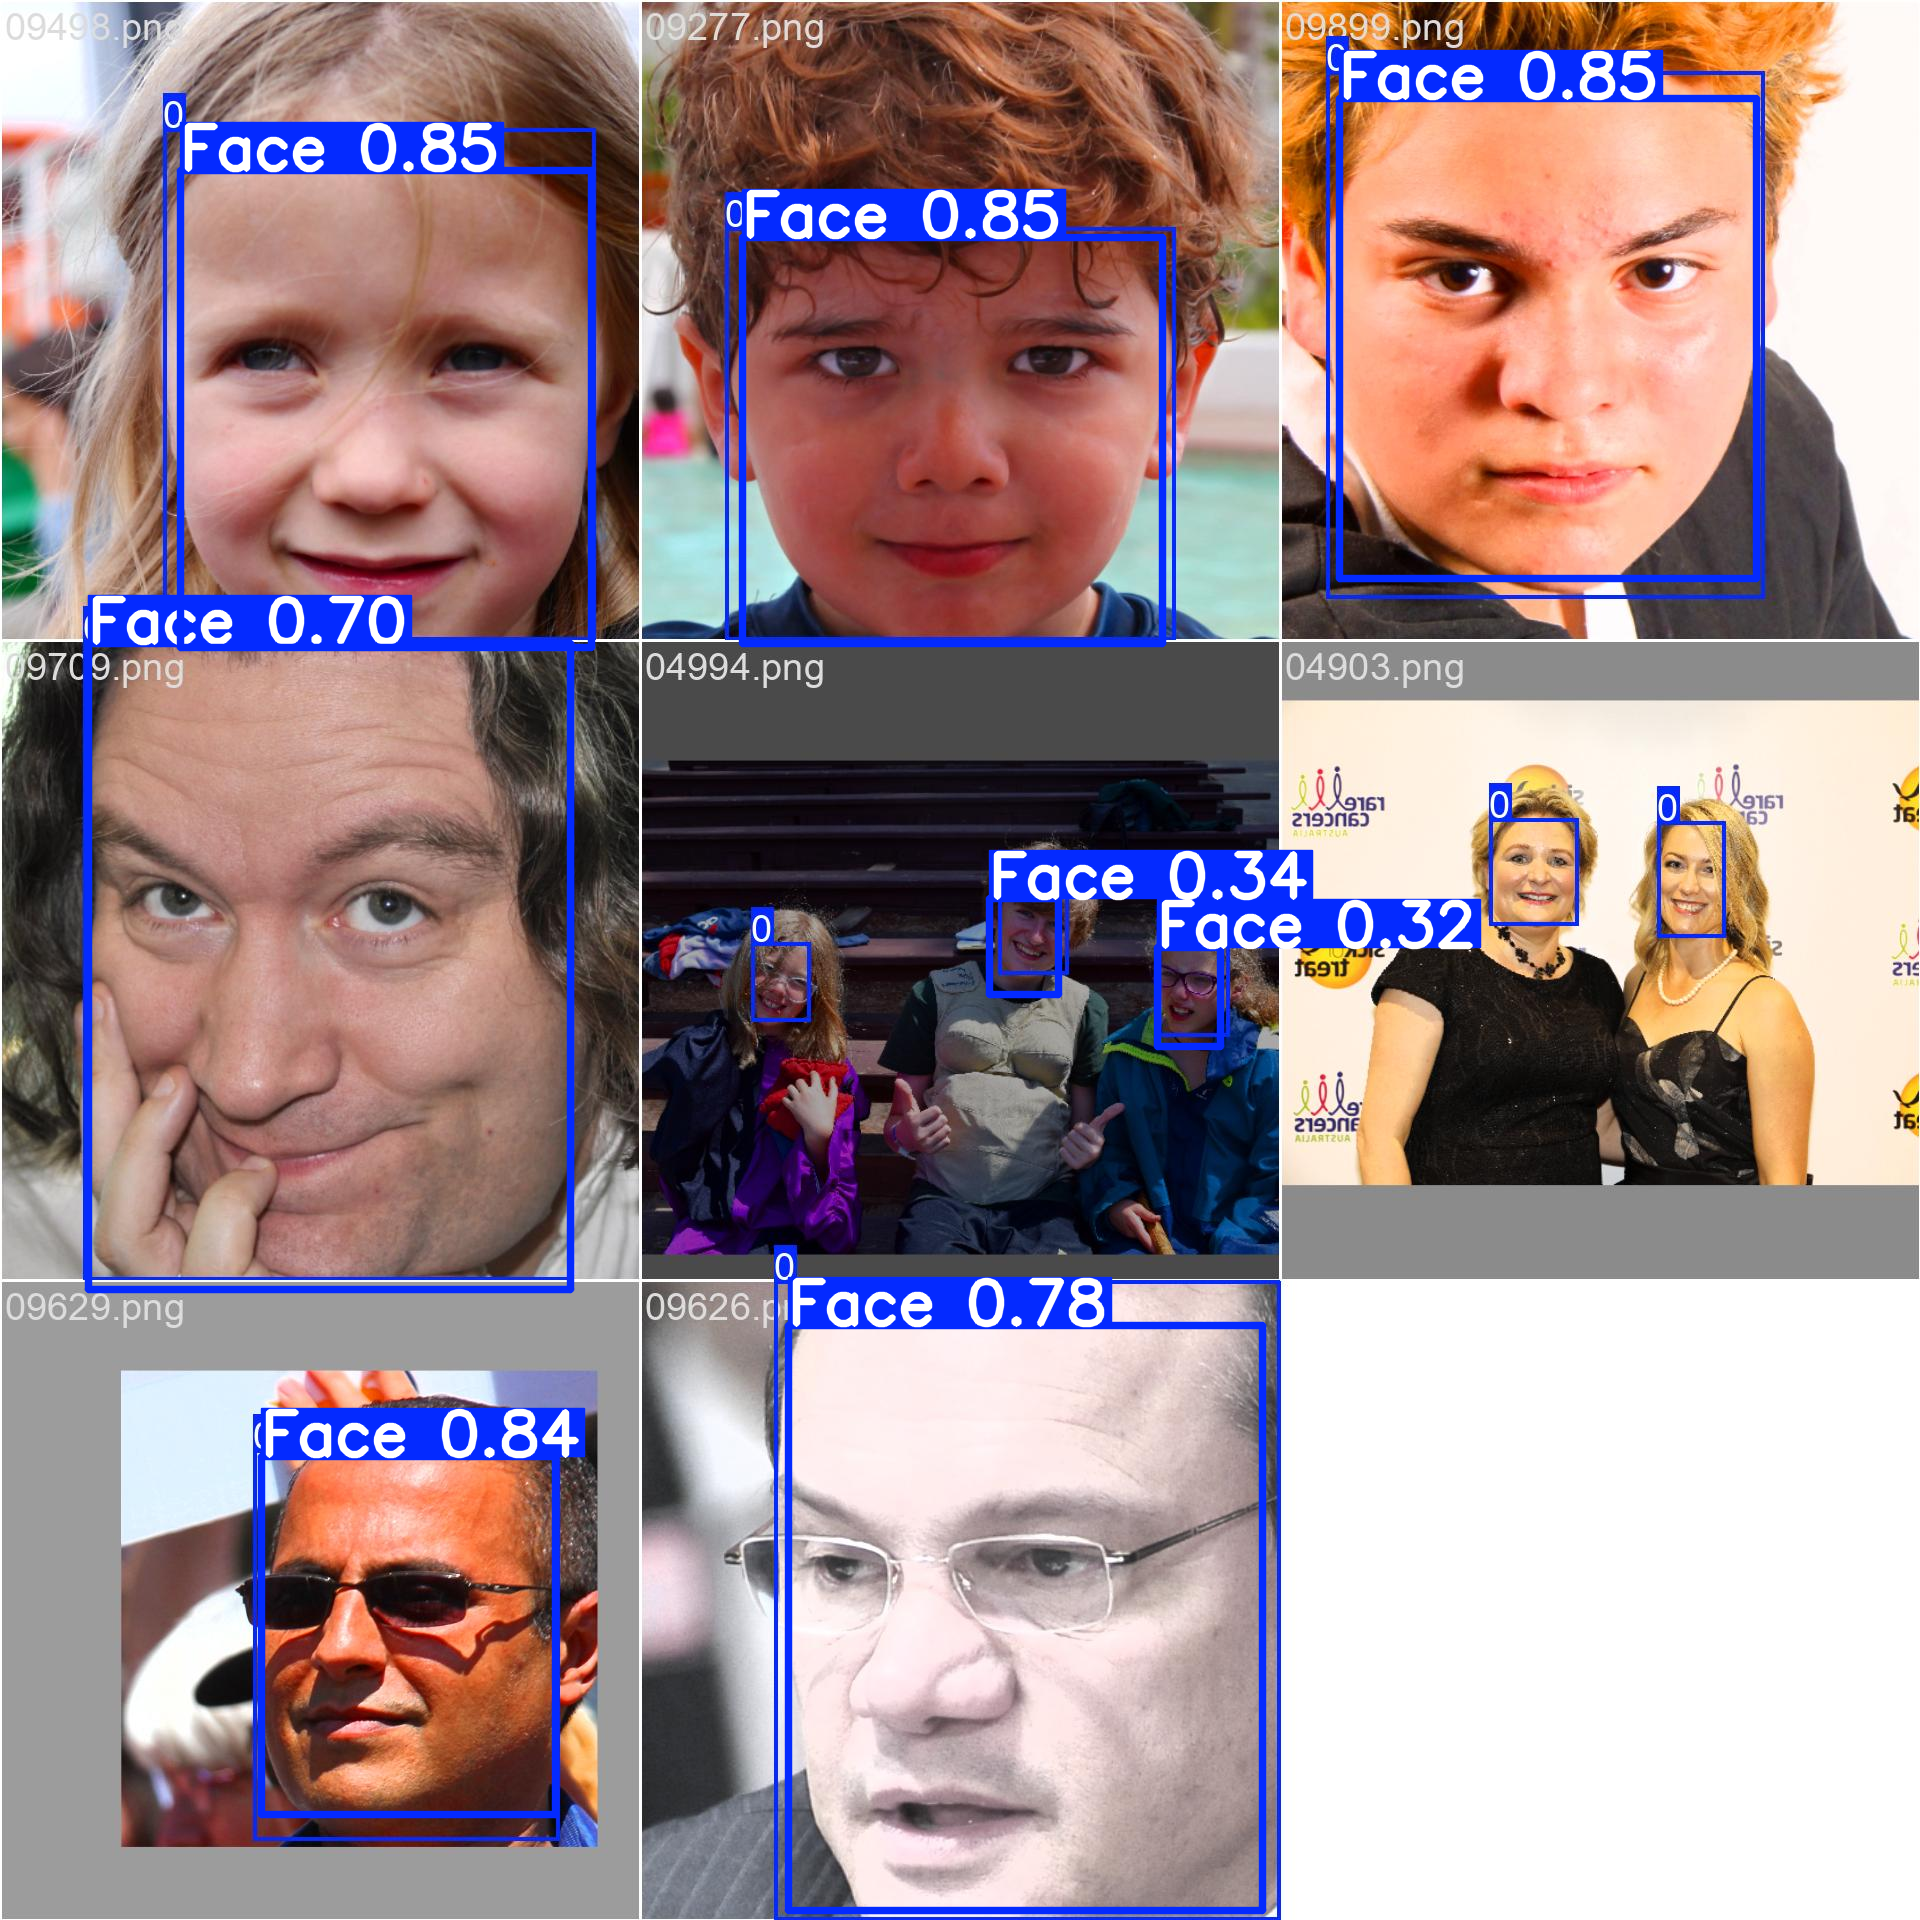

In [40]:
train_img = "/content/face_detection/yolov8_face/train_batch0.jpg"
results = model.predict(train_img, save=True)
if results:
    results[0].show()

In [54]:
import glob
test_images = glob.glob("/content/face_detection/yolov8_face/BoxPR_curve.png")

for img in test_images:
    results = model.predict(img, save=True)


image 1/1 /content/face_detection/yolov8_face/BoxPR_curve.png: 448x640 (no detections), 300.1ms
Speed: 22.3ms preprocess, 300.1ms inference, 3.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict


### **Model Evaluation**

In [43]:
results = model.val()

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 1273.1±382.1 MB/s, size: 3304.5 KB)
val: Scanning /root/.cache/kagglehub/datasets/freak2209/face-data/versions/1/Custom_Data/labels/train.cache... 1154 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1154/1154 1.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 73/73 5.5s/it 6:41
                   all       1154       1424      0.976      0.937       0.97      0.811
Speed: 2.4ms preprocess, 219.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /content/runs/detect/val


### **Test The Model**

In [52]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])
    ))

test_img = list(uploaded.keys())[0]

Saving facedetection..4.jpg to facedetection..4.jpg
User uploaded file "facedetection..4.jpg" with length 22473 bytes



image 1/1 /content/facedetection..4.jpg: 352x640 14 Faces, 155.2ms
Speed: 9.9ms preprocess, 155.2ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
Results saved to /content/runs/detect/predict


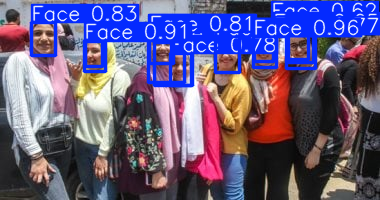

In [53]:
results = model.predict(test_img, save=True)
results[0].show()